In [1]:
##importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Importing the data

In [2]:
df = pd.read_csv("IMDb_Movies_India.csv",encoding ='latin-1')

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
df.describe(include="object").T

,count,unique,top,freq
Name,15509,13838,Anjaam,7
Year,14981,102,(2019),410
Duration,7240,182,120 min,240
Genre,13632,485,Drama,2780
Votes,7920,2034,8,227
Director,14984,5938,Jayant Desai,58
Actor 1,13892,4718,Ashok Kumar,158
Actor 2,13125,4891,Rekha,83
Actor 3,12365,4820,Pran,91


In [6]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<AxesSubplot:>

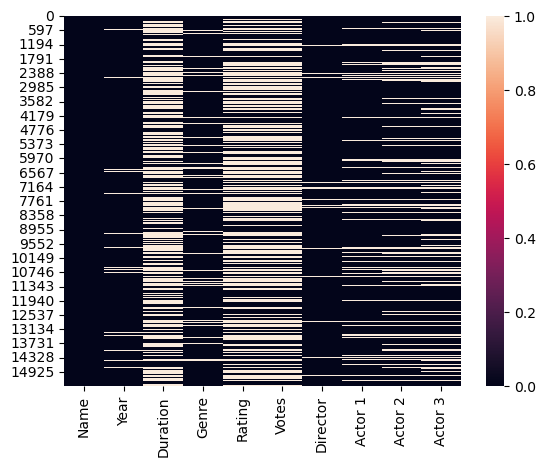

In [7]:
sns.heatmap(df.isnull())

In [8]:
df['Year'] = df['Year'].interpolate(method='pad')
df['Duration'] = df['Duration'].interpolate(method='pad')
df['Genre'] = df['Genre'].interpolate(method='pad')
df['Rating'] = df['Rating'].interpolate(method='pad')
df['Votes'] = df['Votes'].interpolate(method='pad')
df['Director'] = df['Director'].interpolate(method='pad')
df['Actor 1'] = df['Actor 1'].interpolate(method='pad')
df['Actor 2'] = df['Actor 2'].interpolate(method='pad')
df['Actor 3'] = df['Actor 3'].interpolate(method='pad')

In [9]:
df.isna().any()

Name        False
Year         True
Duration     True
Genre       False
Rating       True
Votes        True
Director    False
Actor 1     False
Actor 2     False
Actor 3     False
dtype: bool

<AxesSubplot:>

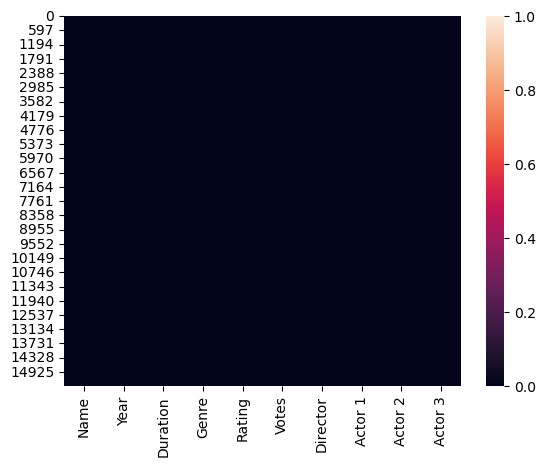

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.isna().sum()

Name        0
Year        1
Duration    1
Genre       0
Rating      1
Votes       1
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [12]:
df= df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15508 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15508 non-null  object 
 1   Year      15508 non-null  object 
 2   Duration  15508 non-null  object 
 3   Genre     15508 non-null  object 
 4   Rating    15508 non-null  float64
 5   Votes     15508 non-null  object 
 6   Director  15508 non-null  object 
 7   Actor 1   15508 non-null  object 
 8   Actor 2   15508 non-null  object 
 9   Actor 3   15508 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.3+ MB


In [13]:
df['Votes']= df['Votes'].str.replace(',','')
df['Year']= df['Year'].str.strip('()')
df['Duration']=df['Duration'].str.strip(' min')

In [14]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",7.0,8,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,Drama,4.4,35,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [15]:
df['Votes'] = pd.to_numeric(df['Votes'],errors='coerce')
df['Year'] = pd.to_numeric(df['Year'],errors = 'coerce')
df['Duration']=pd.to_numeric(df['Duration'],errors='coerce')
df['Rating']=pd.to_numeric(df['Rating'],errors='coerce')


In [16]:
upper_limit1=df["Votes"].mean() + 3*df["Votes"].std()
lower_limit2=df["Votes"].mean() - 3*df["Votes"].std()
upper_limit3=df["Duration"].mean() + 3*df["Duration"].std()
lower_limit4=df["Duration"].mean() - 3*df["Duration"].std()
upper_limit5=df["Year"].mean() + 3*df["Year"].std()
lower_limit6=df["Year"].mean() - 3*df["Year"].std()
upper_limit7=df["Rating"].mean() + 3*df["Rating"].std()
lower_limit8=df["Rating"].mean() - 3*df["Rating"].std()
print("upper limit1: ",upper_limit1)
print("lower limit2: ",lower_limit2)
print("upper limit3: ",upper_limit3)
print("lower limit4: ",lower_limit4)
print("upper limit5: ",upper_limit5)
print("lower limit6: ",lower_limit6)
print("upper limit7: ",upper_limit7)
print("lower limit8: ",lower_limit8)

upper limit1:  33562.4775548585
lower limit2:  -29778.312823176355
upper limit3:  214.55059184691862
lower limit4:  44.441025382898275
upper limit5:  2063.5996741545277
lower limit6:  1911.0558584737933
upper limit7:  9.94448758998789
lower limit8:  1.743041427293548


In [17]:
#find the outliers
outliers_df=df.loc[(df["Votes"]> upper_limit1) |(df["Votes"] < lower_limit2)]
outliers_df=df.loc[(df["Duration"]> upper_limit3) |(df["Duration"] < lower_limit4)]
outliers_df=df.loc[(df["Year"]> upper_limit5) |(df["Year"] < lower_limit6)]
outliers_df=df.loc[(df["Rating"]> upper_limit7) |(df["Rating"] < lower_limit8)]
outliers_df.shape

(22, 10)

In [18]:
#remove outliers from the data
new_df =df.loc[(df["Votes"]< upper_limit1) & (df["Votes"] > lower_limit2)]
new_df =df.loc[(df["Duration"]< upper_limit3) & (df["Duration"] > lower_limit4)]
new_df =df.loc[(df["Year"]< upper_limit5) & (df["Year"] > lower_limit6)]
new_df =df.loc[(df["Rating"]< upper_limit7) & (df["Rating"] > lower_limit8)]

print("the outliers: ",len(df)-len(new_df))

the outliers:  22


In [19]:
output_file = "IMDB_rating.csv"
new_df.to_csv(output_file,index=False)

In [20]:
new = pd.read_csv("IMDB_rating.csv")
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15486 entries, 0 to 15485
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15486 non-null  object 
 1   Year      15486 non-null  int64  
 2   Duration  15486 non-null  int64  
 3   Genre     15486 non-null  object 
 4   Rating    15486 non-null  float64
 5   Votes     15482 non-null  float64
 6   Director  15486 non-null  object 
 7   Actor 1   15486 non-null  object 
 8   Actor 2   15486 non-null  object 
 9   Actor 3   15486 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.2+ MB


In [21]:
top_10_movies = df.loc[new['Rating'].sort_values(ascending=False)[:10].index]
top_10_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
5405,Halaku,1956,122,"Adventure, Drama, Musical",6.8,36.0,D.D. Kashyap,Meena Kumari,Ajit,Pran
2562,Breathtaken...,2018,82,"Animation, Action, Adventure",6.3,33.0,Munna Rizvi,Sahil Akhtar,Kuwar Aziz,Sheetal Kale
5072,Ghayal Sherni,1988,127,"Action, Crime, Thriller",5.4,11.0,K. Bapaiah,Aruna,Jayanthi,Satyanarayana Kaikala
14200,The Players,2016,111,Drama,8.7,85.0,Amulya Baki,Neeraj Joshi,Deeptanshu Sinha,Kashish Bharti
14201,The Power,2021,154,"Action, Crime, Drama",5.7,1544.0,Mahesh Manjrekar,Vidyut Jammwal,Shruti Haasan,Salil Ankola
6838,Jugari,1939,145,"Comedy, Drama",5.3,73.0,Paidi Jairaj,Manoj Bajpayee,Hrishitaa Bhatt,Vijay Raaz
11683,Ramayana: The Epic,2010,98,"Animation, Adventure, Family",5.9,456.0,Chetan Desai,Manoj Bajpayee,Juhi Chawla,Ashutosh Rana
9090,Meghdoot,1945,79,Romance,6.4,9.0,Debaki Bose,Leela Desai,Shahu Modak,Rahul Roy
13209,Silence Please... The Dressing Room,2004,100,Thriller,2.9,13.0,Sanjay Srinivas,Tom Alter,Salil Ankola,Sonali Kulkarni
8329,Love Kaa Taddka,2009,164,"Comedy, Drama",4.7,28.0,Rajan Waghdhare,Ahmed Faisal Inam,Sammir Dattani,Nauheed Cyrusi


In [22]:
result =new.loc[new.groupby('Year')['Rating'].idxmax()]
result = result.sort_values(by=['Year','Rating'])

result

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
9458,Mohini Bhasmasur,1913,155,"Drama, Fantasy",5.7,10903.0,Dhundiraj Govind Phalke,Kamlabai Gokhale,Durgabai,Nazar
12553,Satyavan Savitri,1914,52,Documentary,5.7,6302.0,Dhundiraj Govind Phalke,Kailash Satyarthi,Gautami Kapoor,Divya Khosla Kumar
3528,Death of Narayanrao Peshwa,1915,151,"Drama, Romance",7.5,37149.0,Shree Nath Patankar,G. Ranade,D. Joshi,K.G. Gokhale
8132,Lanka Dahan,1917,107,"Adventure, Drama, Fantasy",6.7,22.0,Dhundiraj Govind Phalke,Anna Salunke,Ganpat G. Shinde,D.D. Dabke
7323,Karna,1922,130,"Action, Drama, History",4.4,16.0,Shree Nath Patankar,Raja Sandow P.K.,Keshavrao Dhaiber,Kamaladevi
...,...,...,...,...,...,...,...,...,...,...
1313,Ashok Vatika,2018,97,Drama,9.3,7.0,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
5072,Gho Gho Rani,2019,105,"History, Romance",9.4,47.0,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
2562,Breed,2020,82,Drama,9.6,48.0,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
5405,Half Songs,2021,79,"Music, Romance",9.7,7.0,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani


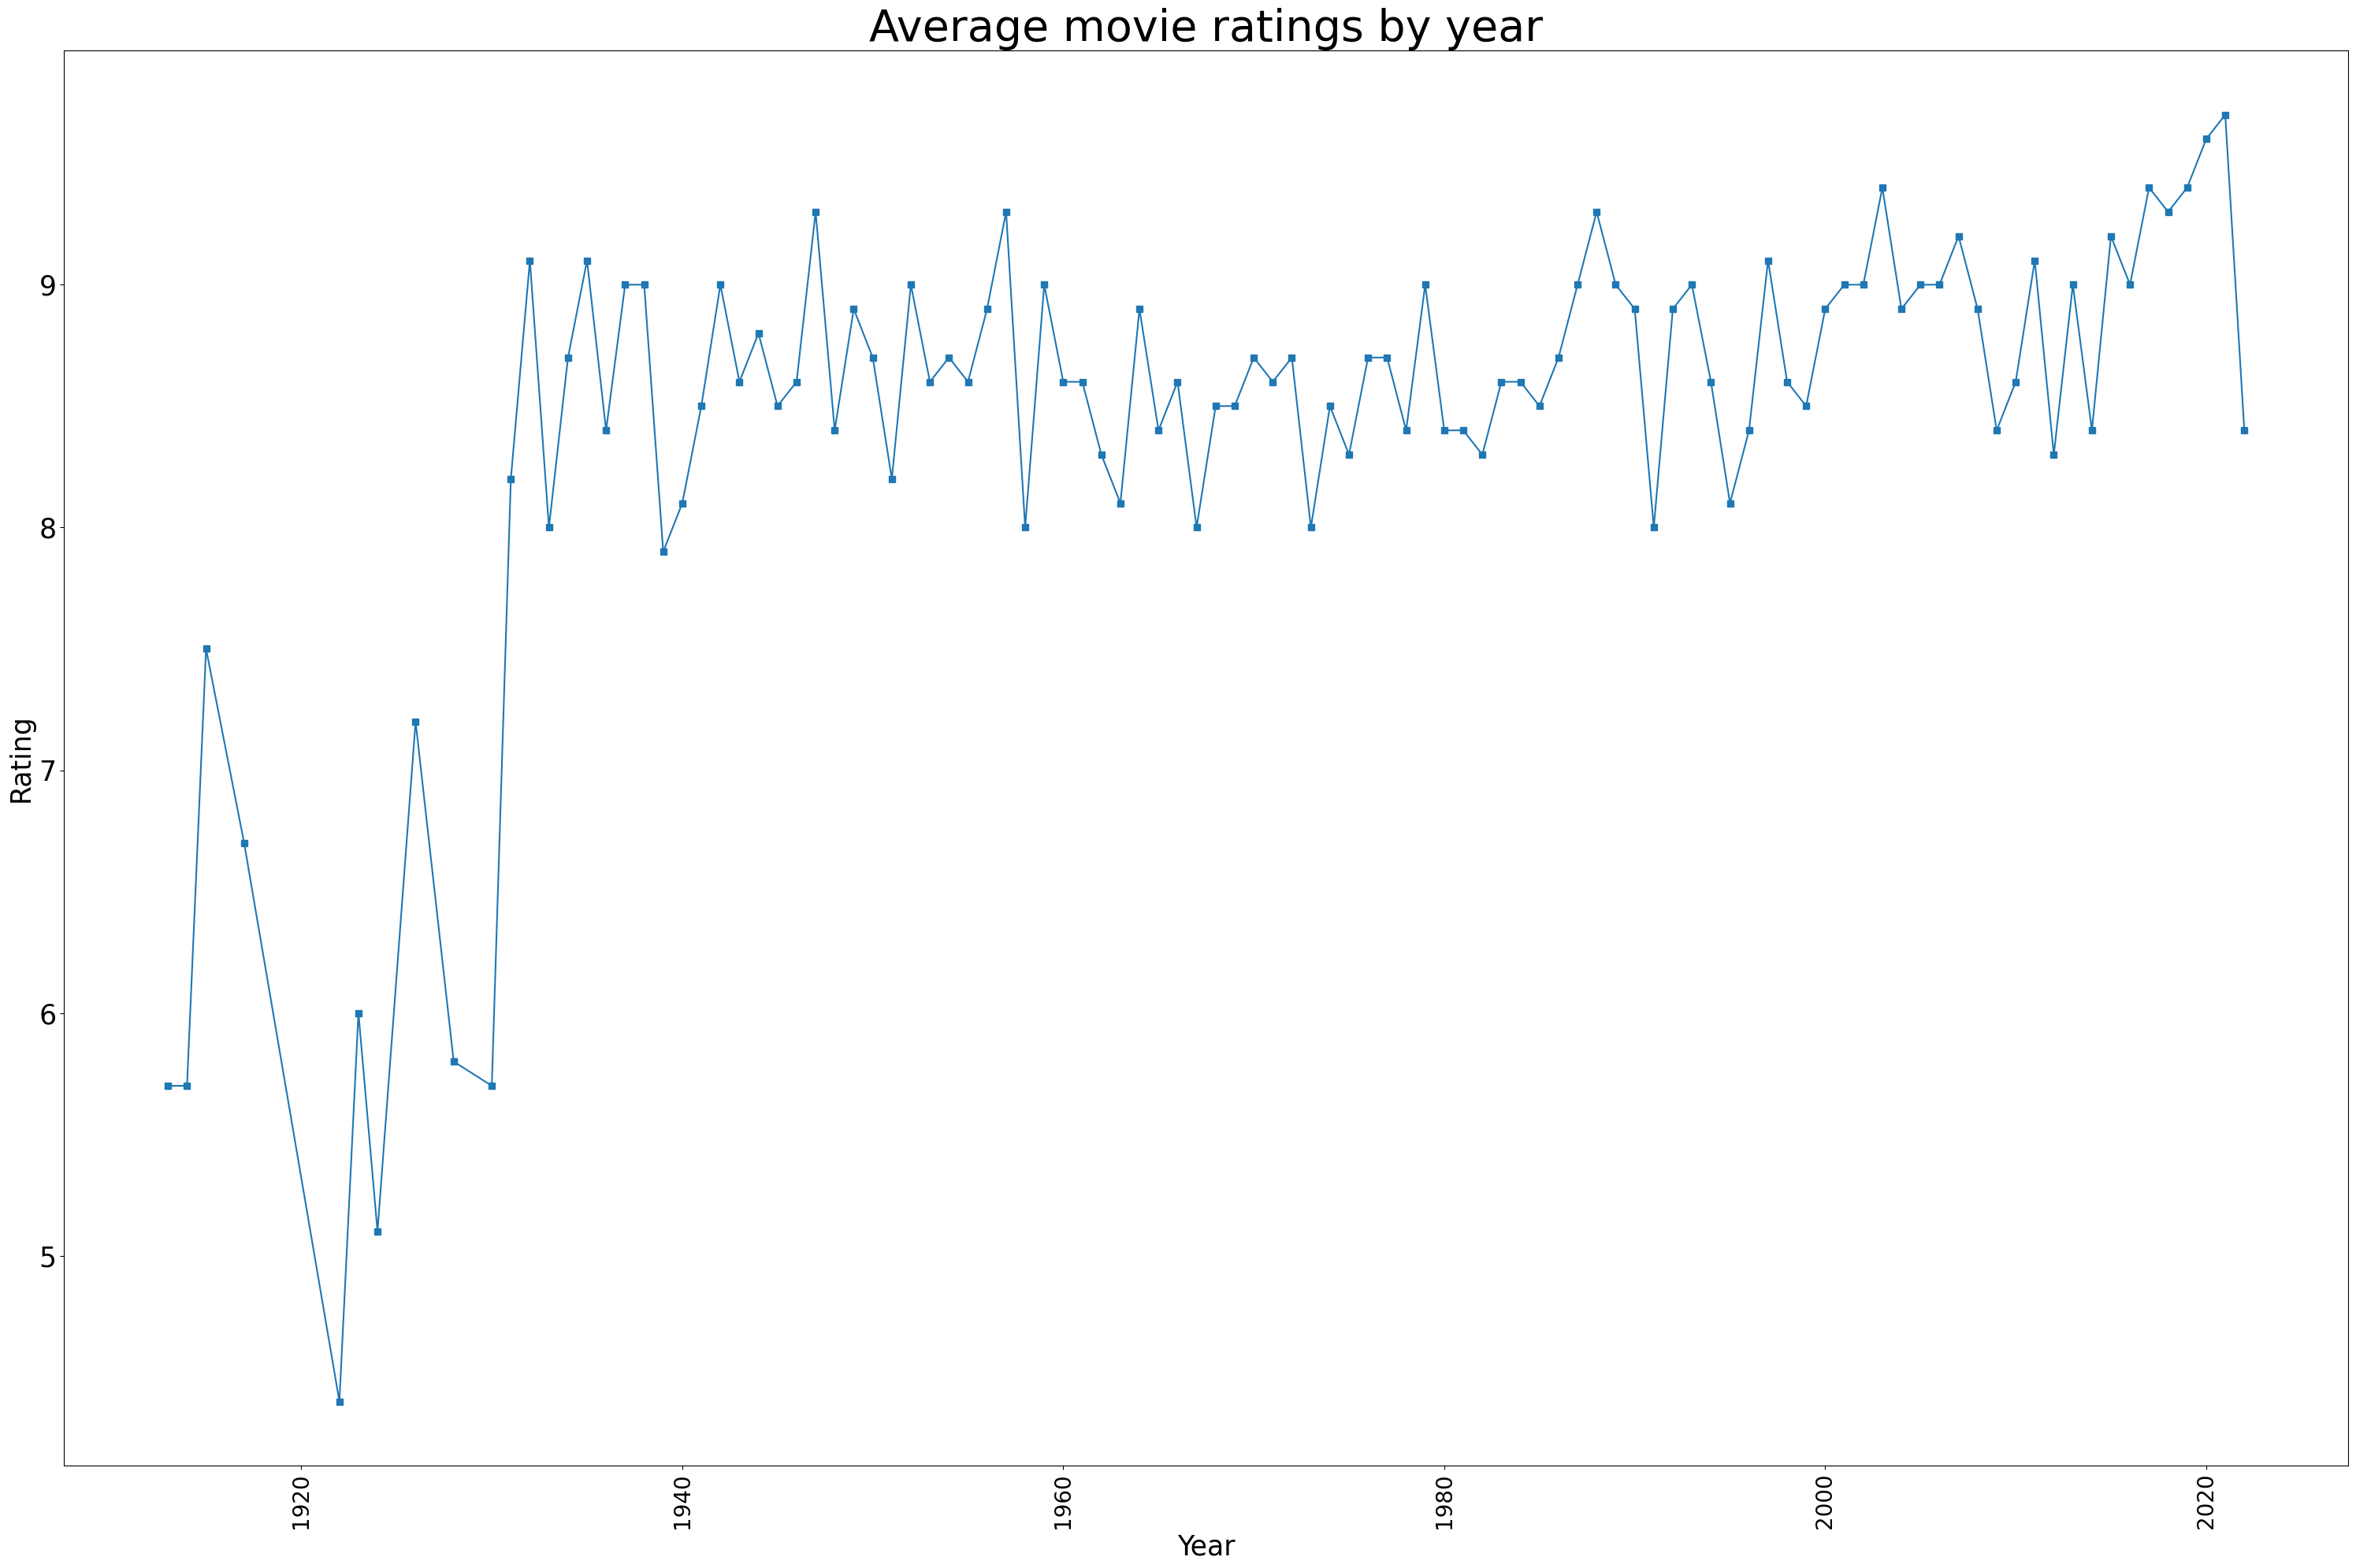

In [23]:
grouped=result.groupby('Year')['Rating'].mean().reset_index()
plt.figure(figsize = (30,20))
plt.plot(grouped['Year'], grouped['Rating'],marker='s',linestyle='-')
plt.xlabel('Year',fontsize=25)
plt.ylabel('Rating',fontsize=25)
plt.title('Average movie ratings by year',fontsize=40)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=25)
plt.tight_layout()
plt.show()

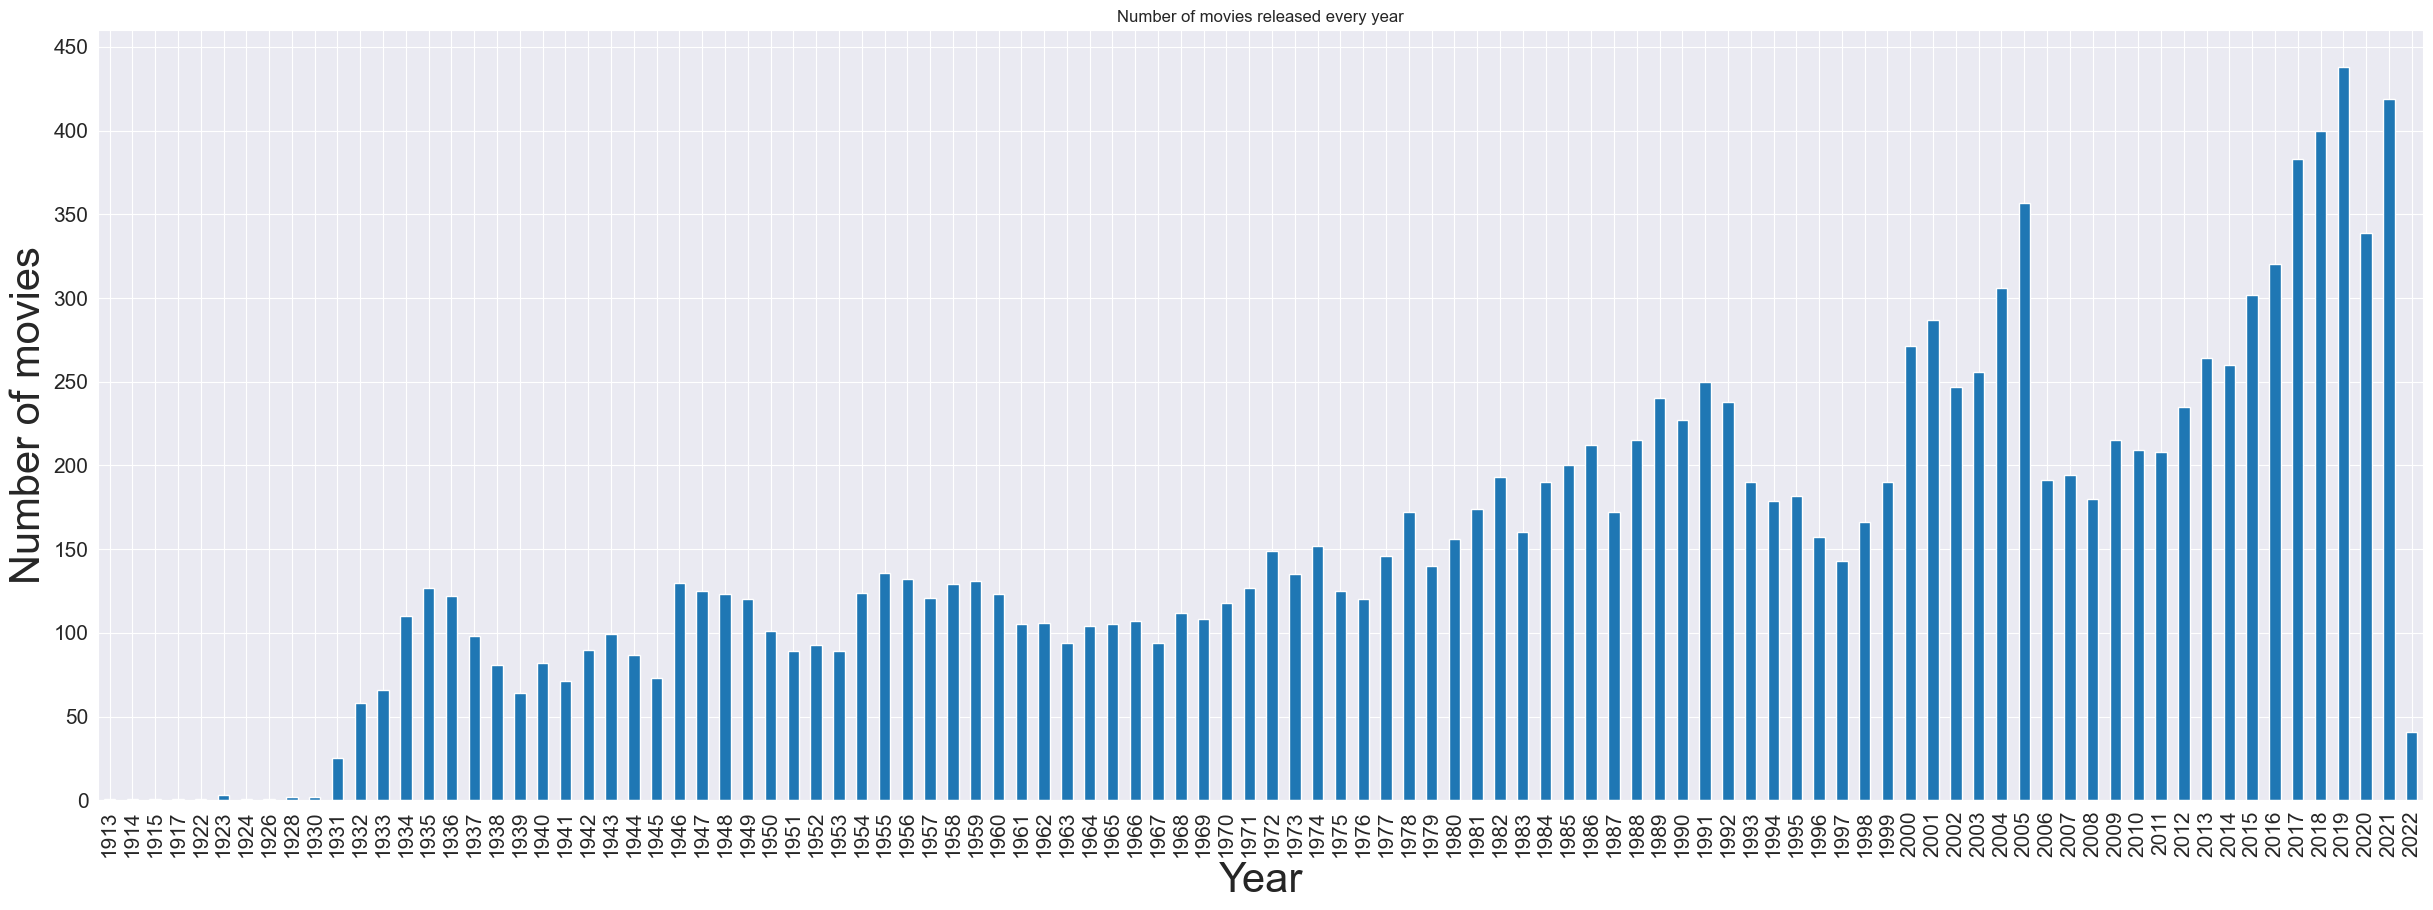

In [24]:
sns.set_style('darkgrid')
result = df.groupby(['Year'])['Name'].count()
plt.figure(figsize=(30,10))
result.plot(kind='bar')
plt.xlabel('Year',fontsize =30 )
plt.yticks(np.arange(0,500,50),fontsize=15)
plt.xticks(rotation = 90,fontsize=15)
plt.ylabel('Number of movies',size=30)
plt.title('Number of movies released every year')
plt.show()

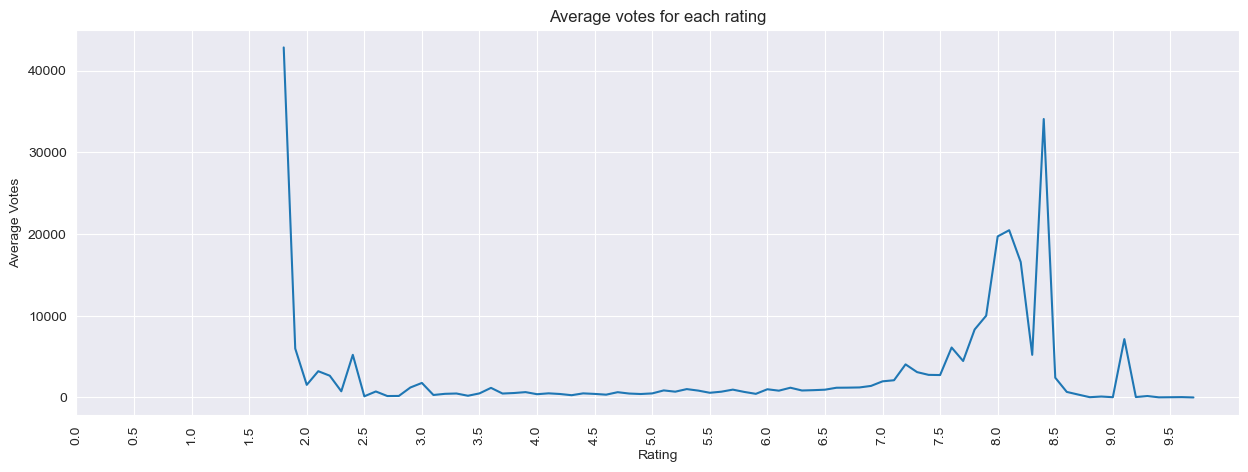

In [25]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.lineplot(x='Rating',y='Votes',data = new , ci =None)
plt.xlabel('Rating')
plt.ylabel('Average Votes')
plt.xticks(np.arange(0,10,0.5))
plt.xticks(rotation=90,fontsize=10)
plt.title('Average votes for each rating')
plt.show()



In [26]:
sns.set_style('darkgrid')
d = df.loc[(df['Rating']>8) & (df['Votes']>100000),['Name','Rating','Votes']]
print("Name of the movies that have Rating >8 and Votes >100000")
d

Name of the movies that have Rating >8 and Votes >100000


,Name,Rating,Votes
75,3 Idiots,8.4,357889.0
3410,Dangal,8.4,165074.0
3411,Dangebaaz,8.4,165074.0
8035,Lagaan: Once Upon a Time in India,8.1,107234.0
8036,Lagan,8.1,107234.0
8037,Lagan,8.1,107234.0
8228,Like Stars on Earth,8.4,175810.0
8229,Lilith,8.4,175810.0
8230,LILKEE,8.4,175810.0
8231,Lines,8.4,175810.0


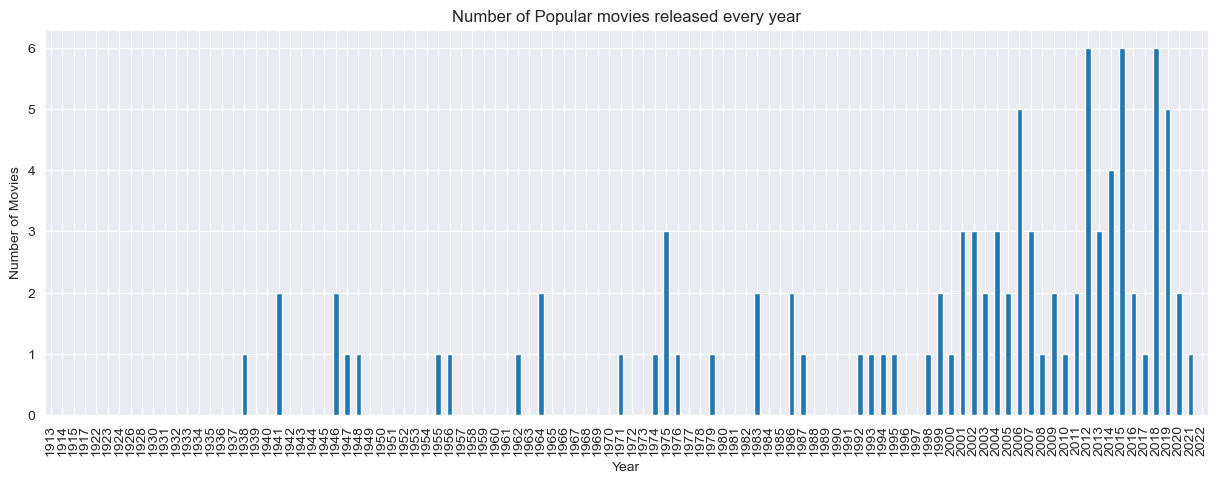

In [27]:
df['ConditionMet'] = (df['Rating'] > 8) & (df['Votes'] > 10000)
result = df.groupby('Year')['ConditionMet'].sum()
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
result.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Popular movies released every year')
plt.xticks(rotation=90)
plt.show()
          


The number of movies that has rating greater than 5 Year
1913      1
1914      1
1915      1
1917      1
1922      0
       ... 
2018    302
2019    337
2020    260
2021    304
2022     31
Name: ConditionMet, Length: 102, dtype: int64


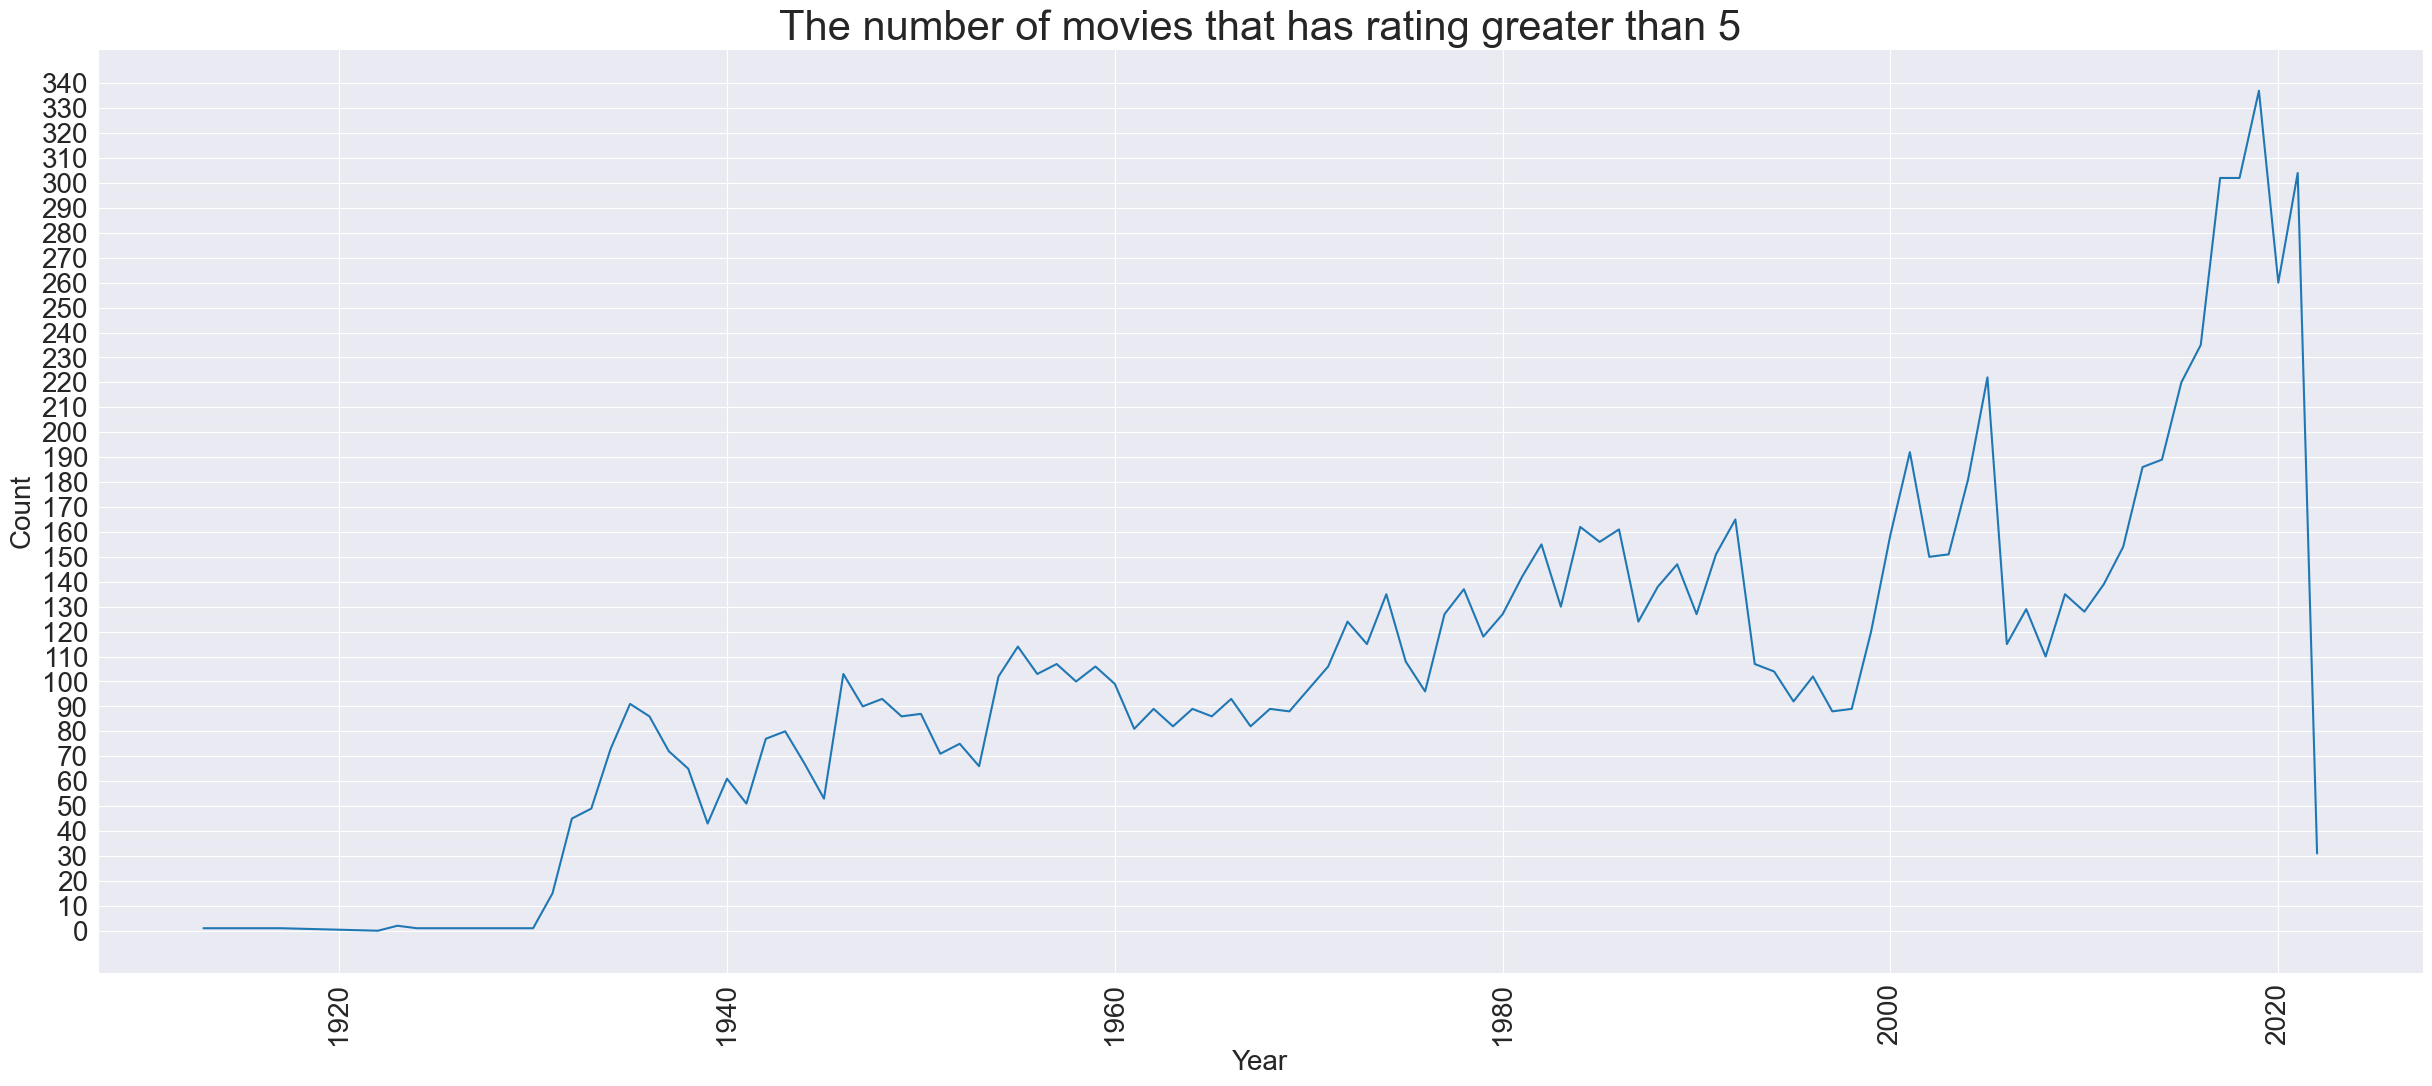

In [28]:
df['ConditionMet'] = (df['Rating'] > 5) 
result = df.groupby('Year')['ConditionMet'].sum()
print('The number of movies that has rating greater than 5',result)
sns.set_style('darkgrid')
plt.figure(figsize=(30,12))
result.plot(kind='line')
plt.title('The number of movies that has rating greater than 5',fontsize=30)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=20, rotation = 90)
plt.yticks(np.arange(0,350,10),fontsize=20)

plt.show()

In [29]:
result = df.sort_values(by=['Year', 'Rating'], ascending=[True, True])
grouped = result.groupby('Year').agg({'Rating': 'mean', 'Votes': 'mean'}).reset_index()


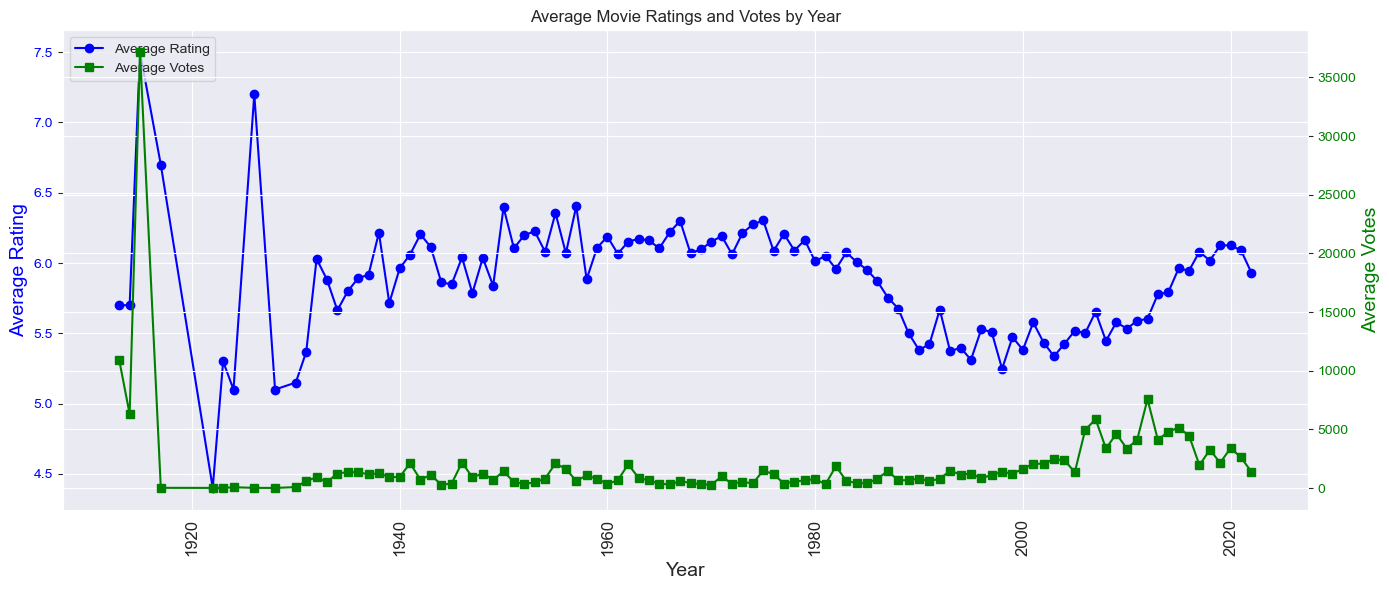

In [30]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot the first y-axis (average rating)
ax1.plot(grouped['Year'], grouped['Rating'], marker='o', linestyle='-', label='Average Rating', color='blue')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Average Rating', fontsize=14, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=90, labelsize=12)

# Create a second y-axis (average votes)
ax2 = ax1.twinx()
ax2.plot(grouped['Year'], grouped['Votes'], marker='s', linestyle='-', label='Average Votes', color='green')
ax2.set_ylabel('Average Votes', fontsize=14, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add legends for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

plt.title('Average Movie Ratings and Votes by Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
new['Duration'] = pd.to_numeric(new['Duration'],errors='coerce')
result = new.sort_values(by=['Year', 'Duration'], ascending=[True, True])
grouped = result.groupby('Year').agg({'Duration': 'mean', 'Rating': 'mean'}).reset_index()
grouped


,Year,Duration,Rating
0,1913,155.000000,5.700000
1,1914,52.000000,5.700000
2,1915,151.000000,7.500000
3,1917,107.000000,6.700000
4,1922,130.000000,4.400000
...,...,...,...
97,2018,114.972431,6.027820
98,2019,116.043478,6.136842
99,2020,111.916914,6.128487
100,2021,119.198091,6.090931


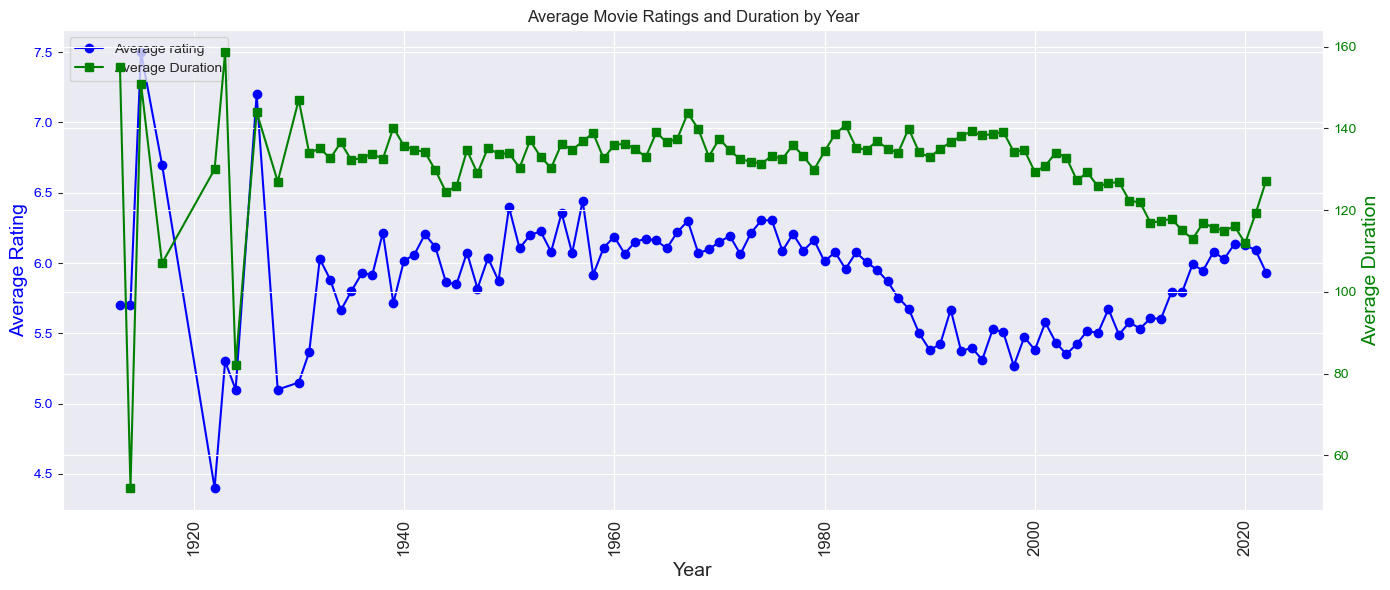

In [32]:
fig, ax1 = plt.subplots(figsize=(14, 6))


ax1.plot(grouped['Year'], grouped['Rating'], marker='o', linestyle='-', label='Average rating', color='blue')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Average Rating', fontsize=14, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=90, labelsize=12)


ax2 = ax1.twinx()
ax2.plot(grouped['Year'], grouped['Duration'], marker='s', linestyle='-', label='Average Duration', color='green')
ax2.set_ylabel('Average Duration', fontsize=14, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add legends for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

plt.title('Average Movie Ratings and Duration by Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
genre_df = new['Genre'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Genre')


genre_counts = genre_df.value_counts()

# Display the number of movies in each genre
print(genre_counts)

Drama          5204
Action         3965
 Drama         3080
 Romance       1902
Comedy         1745
 Thriller      1026
 Crime          964
 Family         893
Romance         862
Thriller        853
 Comedy         519
Crime           502
 Musical        488
Horror          451
Documentary     420
 Mystery        411
 Adventure      333
 Fantasy        327
Adventure       293
Fantasy         238
 History        209
Family          185
Musical         185
Biography       179
Mystery         171
Animation       141
 Horror         128
 Music           81
 Sport           66
 Action          62
 Biography       59
 Sci-Fi          53
 War             40
History          38
Music            23
Sport            11
Sci-Fi           10
 News             9
War               8
 Western          7
Reality-TV        2
 Reality-TV       1
 Short            1
Name: Genre, dtype: int64


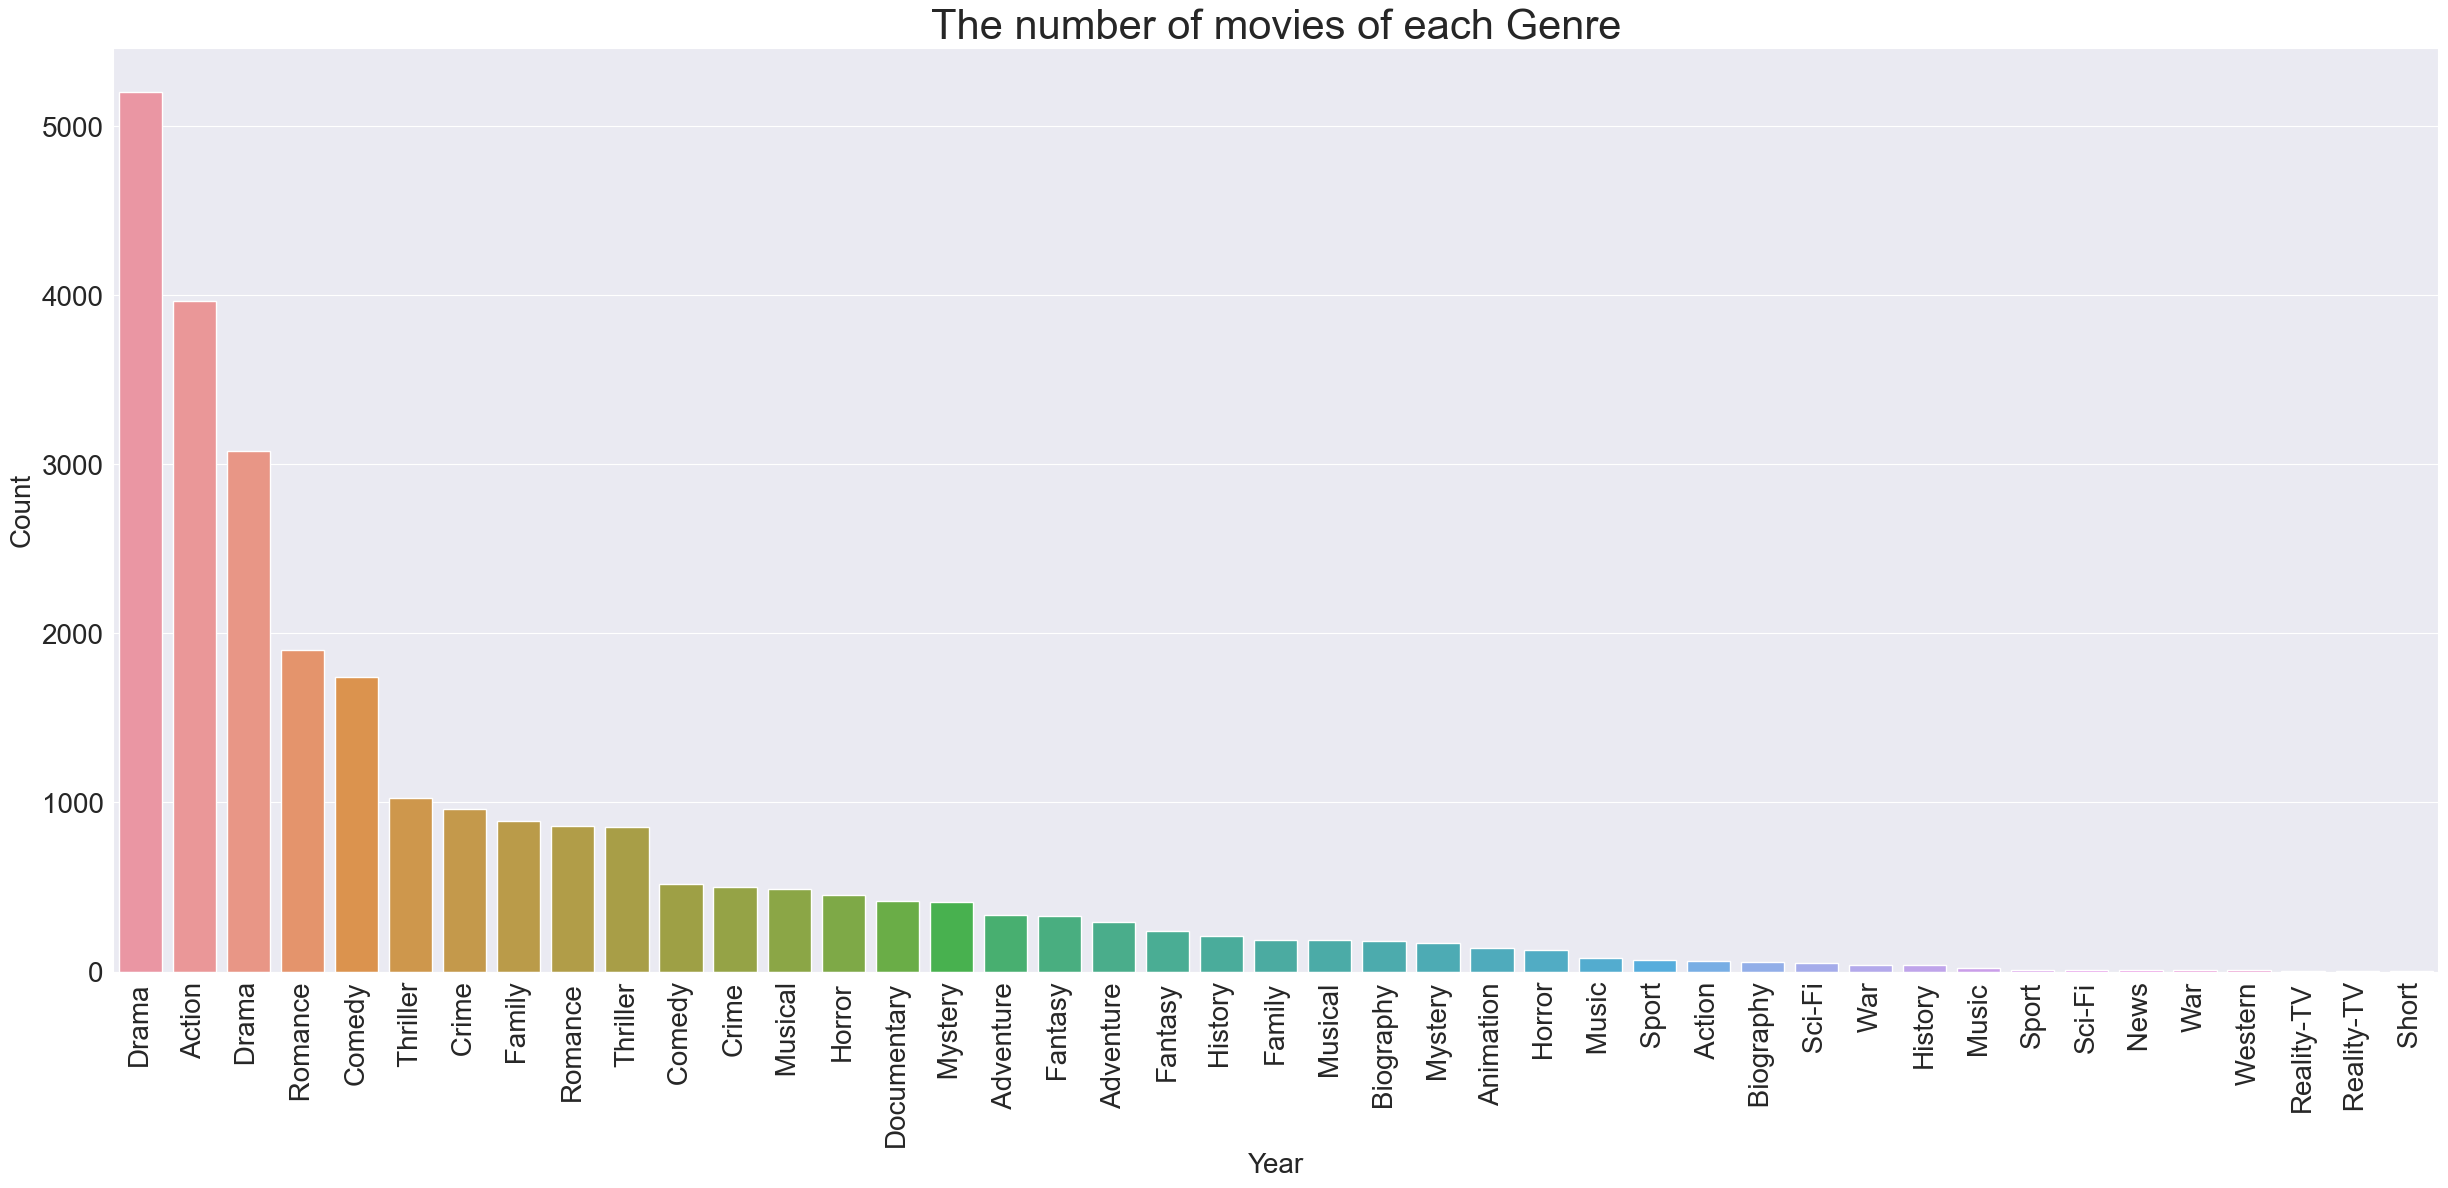

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize=(30,12))
sns.barplot(x= genre_counts.index, y=genre_counts.values,data = df , ci =None)
plt.title('The number of movies of each Genre',fontsize=30)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=20, rotation = 90)
plt.yticks(fontsize=20)

plt.show()

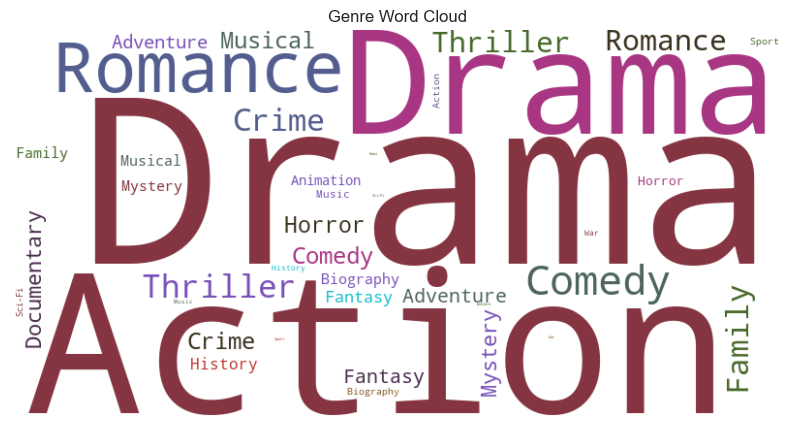

In [35]:
from wordcloud import WordCloud
from random import choice
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E",'#17becf']
def color_func(word, *args, **kwargs):
    return choice(colors)
wordcloud = WordCloud(width=800, height=400, background_color='white',color_func=color_func).generate_from_frequencies(genre_counts)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

In [36]:
director_df = new['Director'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('Director')

# Count the number of movies directed by each director
director_counts = director_df.value_counts()

# Find the director who has directed the most movies
most_movies_director = director_counts.idxmax()
most_movies_count = director_counts.max()

# Print the result
print(f"The director who has directed the most movies is '{most_movies_director}' with {most_movies_count} movies.")

The director who has directed the most movies is 'Kanti Shah' with 64 movies.


In [37]:
directors  = new.groupby('Director').agg({'Rating':['mean','count']})
directors.columns = directors.columns.droplevel(0)
directors.reset_index(inplace=True)
directors.columns = ['Director','Average Rating','Movie count']
directors['Average Rating'] = directors['Average Rating'].round(1)
directors.sort_values(by='Movie count',ascending=False,inplace=True)
directors.head()

,Director,Average Rating,Movie count
2304,Kanti Shah,5.2,64
2034,Jayant Desai,6.1,60
855,Babubhai Mistry,6.3,51
2850,Master Bhagwan,6.0,50
1342,Dhirubhai Desai,6.0,48


In [38]:
df_melted = new.melt(id_vars='Rating', value_name='actor', var_name='role', value_vars=['Actor 1', 'Actor 2', 'Actor 3'])
actor_scores = df_melted.groupby('actor')['Rating'].agg(['mean', 'count'])
actor_scores.reset_index(inplace=True)
actor_scores.columns = ['Actor','Average Score', 'Number of movies']
actor_scores.sort_values('Number of movies', ascending=False, inplace=True)
actor_scores['Average Score']=actor_scores['Average Score'].round(1)
actor_scores

,Actor,Average Score,Number of movies
5105,Mithun Chakraborty,5.4,275
2344,Dharmendra,5.8,262
1310,Ashok Kumar,6.2,258
3559,Jeetendra,5.3,204
650,Amitabh Bachchan,6.2,193
...,...,...,...
2518,Dorothie Bharadwaj,7.2,1
2519,Dr. Amitabh Ghosh,5.0,1
6149,Prabhat Raghunandan,5.7,1
6148,Prabhat Kumar,5.2,1


In [39]:

highly_rated_movies = new[new['Rating'] >8]
if not highly_rated_movies.empty:
    highly_rated_movies_genre=highly_rated_movies['Genre'].str.split(',').explode().str.strip()
    genre_counts = highly_rated_movies_genre.value_counts()
genre_counts

Drama          295
Action          71
Documentary     64
Comedy          56
Crime           54
Romance         48
Thriller        44
Family          28
Biography       24
Mystery         21
Musical         20
History         18
Fantasy         16
Adventure       12
Horror          10
Sport            9
Music            5
War              4
Animation        4
Short            1
Sci-Fi           1
Name: Genre, dtype: int64

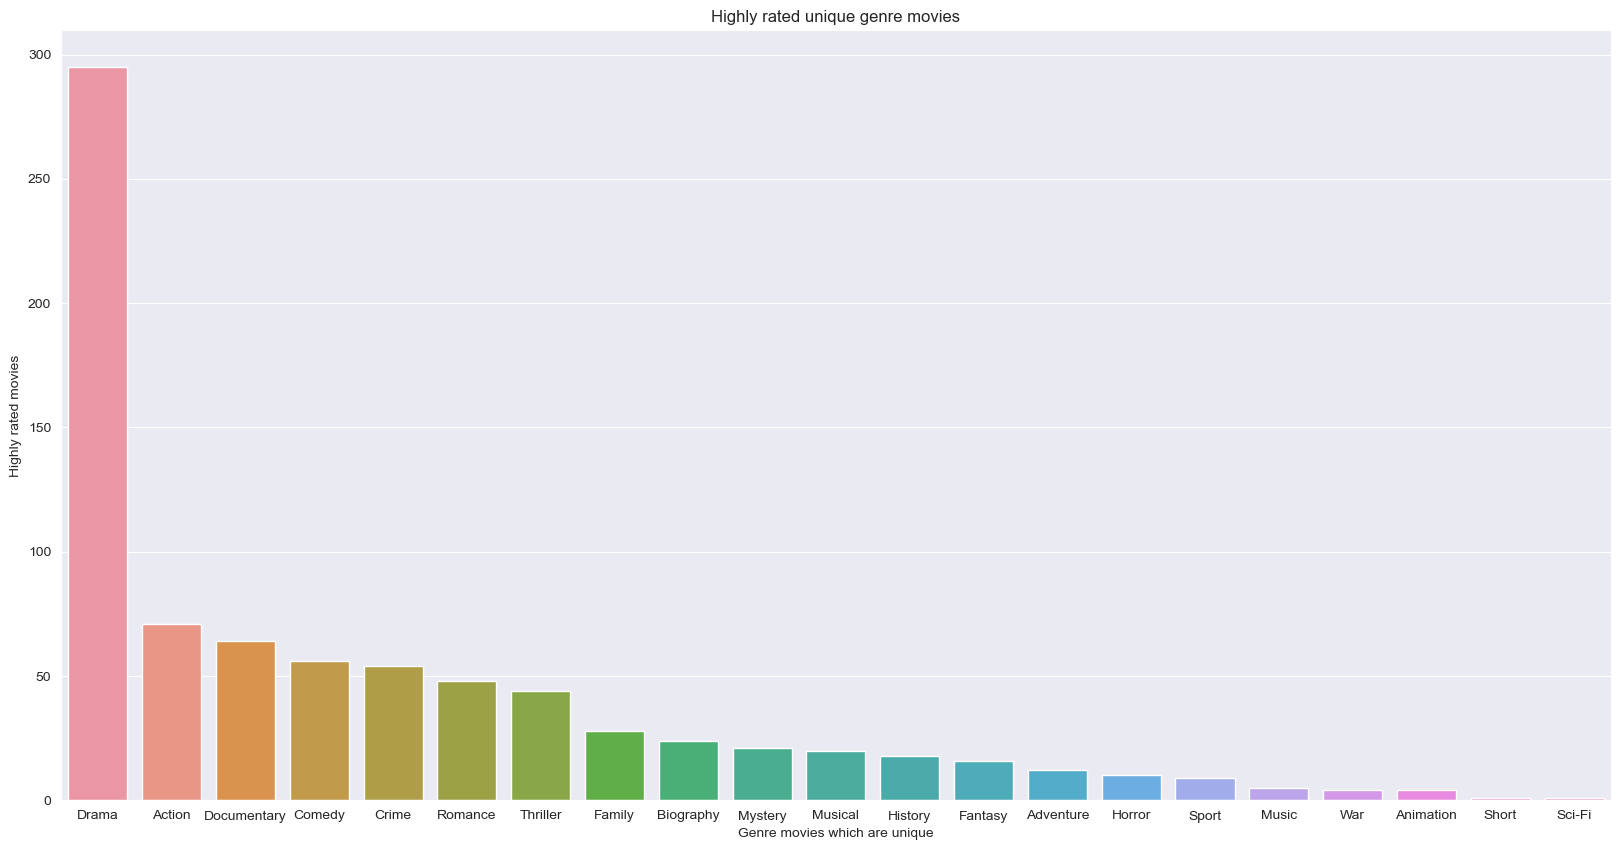

In [40]:
plt.figure(figsize=(20,10))
sns.barplot(x= genre_counts.index, y=genre_counts.values,data = df , ci =None)
plt.xlabel("Genre movies which are unique")
plt.ylabel("Highly rated movies")
plt.title('Highly rated unique genre movies')

plt.show()

# Drama typed movies are most liked by people.

In [41]:
genre_df=new.groupby(['Genre','Director']).agg({'Rating':['max','count']})
genre_df.reset_index(inplace=True)
genre_df.columns = ['Genre','Director','Average Rating', 'Number of movies']
genre_df.sort_values('Number of movies', ascending=False, inplace=True)
filtered_no_movies = genre_df[genre_df['Number of movies']>10]
filtered_no_movies


,Genre,Director,Average Rating,Number of movies
12076,Thriller,Shakeela,9.0,24
3302,Animation,Rajiv Chilaka,8.0,22
6199,Drama,B.R. Ishara,7.0,19
371,Action,Kanti Shah,8.5,17
7175,Drama,Phani Majumdar,7.9,15
7750,Drama,Shyam Benegal,8.0,15
6964,Drama,Master Bhagwan,8.5,14
394,Action,Kodanda Rami Reddy A.,8.1,14
6641,Drama,Jayant Desai,7.7,13
369,Action,Kamran,6.6,13


# Most number of thriller movies directed by shakeela has the highest rating 

In [42]:
df_melted = new.melt(id_vars='Rating', value_name='actor', var_name='role', value_vars=['Actor 1', 'Actor 2', 'Actor 3'])
actor_scores = df_melted.groupby('actor')['Rating'].agg(['mean', 'count'])
actor_scores.reset_index(inplace=True)
actor_scores.columns = ['Actor','Average Score', 'Number of movies']
actor_scores.sort_values('Number of movies', ascending=False, inplace=True)
actor_scores['Average Score']=actor_scores['Average Score'].round(1)
actor_scores


,Actor,Average Score,Number of movies
5105,Mithun Chakraborty,5.4,275
2344,Dharmendra,5.8,262
1310,Ashok Kumar,6.2,258
3559,Jeetendra,5.3,204
650,Amitabh Bachchan,6.2,193
...,...,...,...
2518,Dorothie Bharadwaj,7.2,1
2519,Dr. Amitabh Ghosh,5.0,1
6149,Prabhat Raghunandan,5.7,1
6148,Prabhat Kumar,5.2,1


In [43]:
genre_df=new.groupby('Genre')['Rating'].mean().reset_index()

genre_df.columns=['Genre','Rating_G']
genre_df

,Genre,Rating_G
0,Action,5.499255
1,"Action, Adventure",5.731373
2,"Action, Adventure, Biography",7.800000
3,"Action, Adventure, Comedy",5.888636
4,"Action, Adventure, Crime",5.352381
...,...,...
480,"Thriller, Action",4.966667
481,"Thriller, Musical, Mystery",7.100000
482,"Thriller, Mystery",6.533333
483,"Thriller, Mystery, Family",6.100000


In [44]:
genre_rating_dict = genre_df.set_index('Genre')['Rating_G'].to_dict()
genre_rating_dict
new['Genre'] = new['Genre'].map(genre_rating_dict)
new['Genre']
                                                

0        6.158455
1        6.413333
2        5.700667
3        6.158455
4        6.260714
           ...   
15481    5.499255
15482    5.453699
15483    5.499255
15484    5.499255
15485    5.453699
Name: Genre, Length: 15486, dtype: float64

In [45]:
Director_df=new.groupby('Director')['Rating'].mean().reset_index()

Director_df.columns=['Director','Rating_D']
Director_df

,Director,Rating_D
0,A B Arjun,4.800000
1,A. Bhimsingh,6.768421
2,A. Habib,7.300000
3,A. Jagannathan,5.460000
4,A. Karim,6.600000
...,...,...
5929,Zoya Akhtar,6.800000
5930,Zubair Khan,6.900000
5931,Zubeida,4.250000
5932,Zul Vellani,5.200000


In [46]:
director_rating_dict = Director_df.set_index('Director')['Rating_D'].to_dict()
new['Director'] = new['Director'].map(director_rating_dict)
new['Director']
          

0        7.000000
1        7.000000
2        4.400000
3        6.057143
4        5.358824
           ...   
15481    4.075000
15482    5.122222
15483    4.500000
15484    4.500000
15485    4.350000
Name: Director, Length: 15486, dtype: float64

In [47]:
Actor1_df=new.groupby('Actor 1')['Rating'].mean().reset_index()

Actor1_df.columns=['Actor 1','Rating_A1']
Actor1_df

,Actor 1,Rating_A1
0,A. Muthu,3.300000
1,A. Nairang,6.100000
2,A.K. Hangal,6.133333
3,A.K. Misra,6.100000
4,A.N. Ansari,4.700000
...,...,...
4705,Zoya Afroz,7.450000
4706,Zubeida,6.057143
4707,Zuber K. Khan,4.400000
4708,Zuber Kamal Khan,6.400000


In [48]:
Actor1_rating_dict = Actor1_df.set_index('Actor 1')['Rating_A1'].to_dict()
new['Actor 1'] = new['Actor 1'].map(Actor1_rating_dict)
new['Actor 1']

0        6.850000
1        6.566667
2        5.420000
3        6.122222
4        4.759091
           ...   
15481    5.996429
15482    5.358586
15483    4.500000
15484    4.500000
15485    5.759333
Name: Actor 1, Length: 15486, dtype: float64

In [49]:
new['Actor 2']

0                Vivek Ghamande
1             Plabita Borthakur
2                    Ishita Raj
3            Rituparna Sengupta
4        Aishwarya Rai Bachchan
                  ...          
15481             Sumeet Saigal
15482            Twinkle Khanna
15483            Twinkle Khanna
15484            Twinkle Khanna
15485                Jaya Prada
Name: Actor 2, Length: 15486, dtype: object

In [50]:
Actor2_df=new.groupby('Actor 2')['Rating'].mean().reset_index()

Actor2_df.columns=['Actor 2','Rating_A2']
Actor2_df

,Actor 2,Rating_A2
0,A. Hussain,6.800
1,A. Hussein,6.900
2,A.H. Shore,6.200
3,A.K. Hangal,7.150
4,A.V.M. Rajan,5.800
...,...,...
4881,Zohra,4.275
4882,Zoya Afroz,5.000
4883,Zoya Hussain,7.100
4884,Zubeida,6.200


In [51]:
Actor2_rating_dict = Actor2_df.set_index('Actor 2')['Rating_A2'].to_dict()
new['Actor 2'] = new['Actor 2'].map(Actor2_rating_dict)
new['Actor 2']

0        7.000000
1        6.950000
2        4.400000
3        5.509091
4        5.884211
           ...   
15481    3.700000
15482    4.631250
15483    4.631250
15484    4.631250
15485    5.502041
Name: Actor 2, Length: 15486, dtype: float64

In [52]:
Actor3_df=new.groupby('Actor 3')['Rating'].mean().reset_index()

Actor3_df.columns=['Actor 3','Rating_A3']
Actor3_df

,Actor 3,Rating_A3
0,A. Shah Shikarpuri,2.850000
1,A.H. Shore,6.200000
2,A.K. Agnihotri,4.400000
3,A.K. Hangal,5.841667
4,A.S. Gyani,7.400000
...,...,...
4810,Zoya Hussain,7.700000
4811,Zubeida,4.850000
4812,Zuber K. Khan,6.400000
4813,Zulfi Sayed,3.300000


In [53]:
Actor3_rating_dict = Actor3_df.set_index('Actor 3')['Rating_A3'].to_dict()
new['Actor 3'] = new['Actor 3'].map(Actor3_rating_dict)
new['Actor 3']

0        7.000000
1        7.000000
2        4.450000
3        5.066667
4        5.872727
           ...   
15481    4.600000
15482    5.615254
15483    5.615254
15484    5.615254
15485    4.977778
Name: Actor 3, Length: 15486, dtype: float64

In [54]:
new

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109,6.158455,7.0,8.0,7.000000,6.850000,7.000000,7.000000
1,#Homecoming,2021,90,6.413333,7.0,8.0,7.000000,6.566667,6.950000,7.000000
2,#Yaaram,2019,110,5.700667,4.4,35.0,4.400000,5.420000,4.400000,4.450000
3,...And Once Again,2010,105,6.158455,4.4,35.0,6.057143,6.122222,5.509091,5.066667
4,...Aur Pyaar Ho Gaya,1997,147,6.260714,4.7,827.0,5.358824,4.759091,5.884211,5.872727
...,...,...,...,...,...,...,...,...,...,...
15481,Zulm Ko Jala Doonga,1988,125,5.499255,4.6,11.0,4.075000,5.996429,3.700000,4.600000
15482,Zulmi,1999,129,5.453699,4.5,655.0,5.122222,5.358586,4.631250,5.615254
15483,Zulmi Raj,2005,129,5.499255,4.5,655.0,4.500000,4.500000,4.631250,5.615254
15484,Zulmi Shikari,1988,129,5.499255,4.5,655.0,4.500000,4.500000,4.631250,5.615254


In [55]:
min_value = 0
max_value = 1

# Perform Min-Max scaling
new['votes_scaled'] = (new['Votes'] - new['Votes'].min()) / (new['Votes'].max() - new['Votes'].min()) * (max_value - min_value) + min_value
new.describe()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,votes_scaled
count,15486.000000,15486.000000,15486.000000,15486.000000,15482.000000,15486.000000,15486.000000,15486.000000,15486.000000,15482.000000
mean,1987.326359,129.476172,5.849206,5.849206,1886.308035,5.849206,5.849206,5.849206,5.849206,0.003181
std,25.416493,28.356486,0.422452,1.358631,10550.163094,0.987957,0.931535,0.943326,0.949487,0.017839
min,1913.000000,2.000000,2.400000,1.800000,5.000000,1.800000,1.900000,1.800000,1.800000,0.000000
25%,1969.000000,112.000000,5.574419,4.900000,15.000000,5.300000,5.331579,5.381250,5.375581,0.000017
50%,1992.000000,132.000000,5.845161,6.000000,47.000000,5.900000,5.925000,5.900000,5.864516,0.000071
75%,2009.000000,149.000000,6.158455,6.800000,356.000000,6.455556,6.360465,6.400000,6.400000,0.000593
max,2022.000000,321.000000,9.400000,9.700000,591417.000000,9.700000,9.700000,9.700000,9.700000,1.000000


In [56]:
new.fillna(0,inplace = True)
new.describe()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,votes_scaled
count,15486.000000,15486.000000,15486.000000,15486.000000,15486.000000,15486.000000,15486.000000,15486.000000,15486.000000,15486.000000
mean,1987.326359,129.476172,5.849206,5.849206,1885.820806,5.849206,5.849206,5.849206,5.849206,0.003180
std,25.416493,28.356486,0.422452,1.358631,10548.843930,0.987957,0.931535,0.943326,0.949487,0.017837
min,1913.000000,2.000000,2.400000,1.800000,0.000000,1.800000,1.900000,1.800000,1.800000,0.000000
25%,1969.000000,112.000000,5.574419,4.900000,15.000000,5.300000,5.331579,5.381250,5.375581,0.000017
50%,1992.000000,132.000000,5.845161,6.000000,47.000000,5.900000,5.925000,5.900000,5.864516,0.000071
75%,2009.000000,149.000000,6.158455,6.800000,356.000000,6.455556,6.360465,6.400000,6.400000,0.000593
max,2022.000000,321.000000,9.400000,9.700000,591417.000000,9.700000,9.700000,9.700000,9.700000,1.000000


In [57]:
new=new.drop('Votes',axis =1)
new=new.drop('Name',axis =1)
new


,Year,Duration,Genre,Rating,Director,Actor 1,Actor 2,Actor 3,votes_scaled
0,2019,109,6.158455,7.0,7.000000,6.850000,7.000000,7.000000,0.000005
1,2021,90,6.413333,7.0,7.000000,6.566667,6.950000,7.000000,0.000005
2,2019,110,5.700667,4.4,4.400000,5.420000,4.400000,4.450000,0.000051
3,2010,105,6.158455,4.4,6.057143,6.122222,5.509091,5.066667,0.000051
4,1997,147,6.260714,4.7,5.358824,4.759091,5.884211,5.872727,0.001390
...,...,...,...,...,...,...,...,...,...
15481,1988,125,5.499255,4.6,4.075000,5.996429,3.700000,4.600000,0.000010
15482,1999,129,5.453699,4.5,5.122222,5.358586,4.631250,5.615254,0.001099
15483,2005,129,5.499255,4.5,4.500000,4.500000,4.631250,5.615254,0.001099
15484,1988,129,5.499255,4.5,4.500000,4.500000,4.631250,5.615254,0.001099


In [58]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

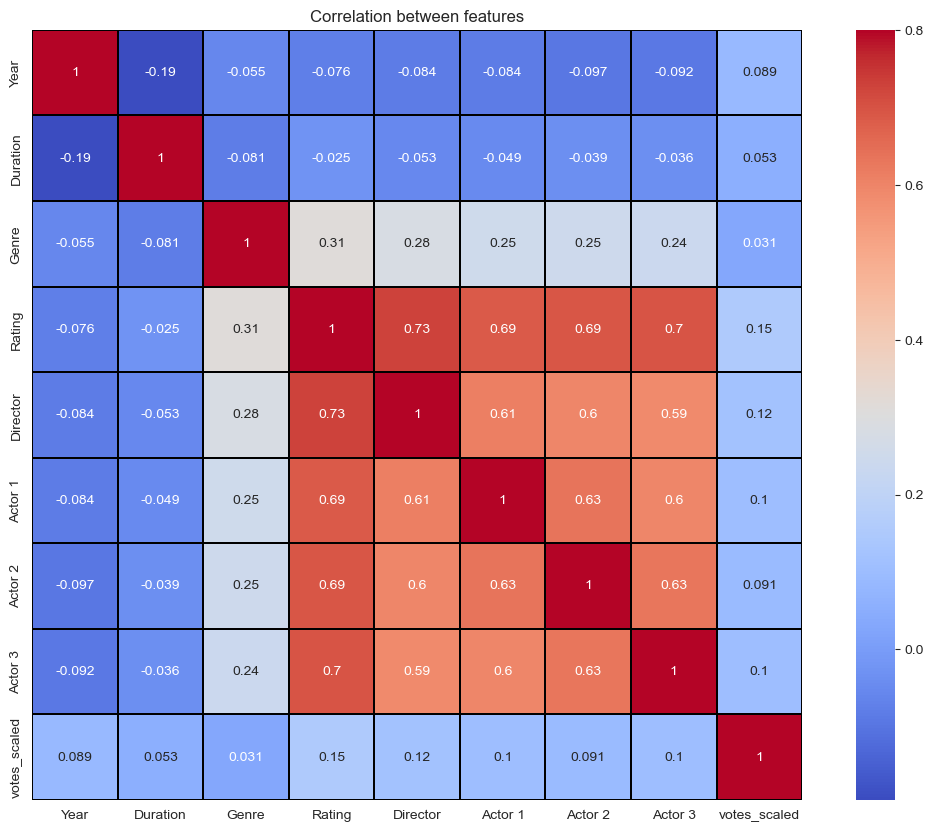

In [59]:
corr= new.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='coolwarm',linecolor="black")
plt.title('Correlation between features')
plt.show()

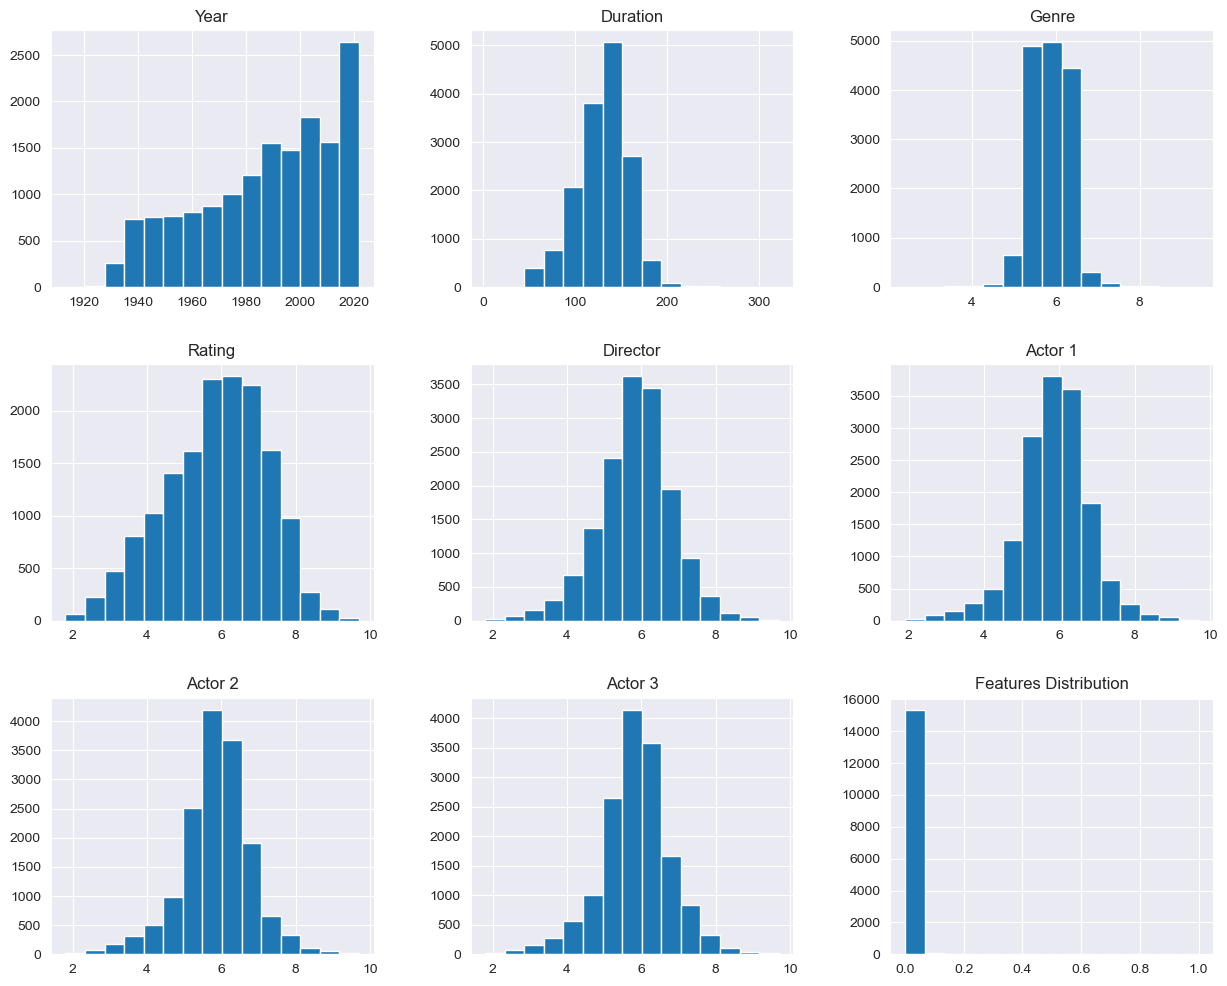

In [60]:
new.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

In [61]:
X=new.drop('Rating',axis=1)
y=new['Rating']

X,y

(       Year  Duration     Genre  Director   Actor 1   Actor 2   Actor 3  \
 0      2019       109  6.158455  7.000000  6.850000  7.000000  7.000000   
 1      2021        90  6.413333  7.000000  6.566667  6.950000  7.000000   
 2      2019       110  5.700667  4.400000  5.420000  4.400000  4.450000   
 3      2010       105  6.158455  6.057143  6.122222  5.509091  5.066667   
 4      1997       147  6.260714  5.358824  4.759091  5.884211  5.872727   
 ...     ...       ...       ...       ...       ...       ...       ...   
 15481  1988       125  5.499255  4.075000  5.996429  3.700000  4.600000   
 15482  1999       129  5.453699  5.122222  5.358586  4.631250  5.615254   
 15483  2005       129  5.499255  4.500000  4.500000  4.631250  5.615254   
 15484  1988       129  5.499255  4.500000  4.500000  4.631250  5.615254   
 15485  1998       130  5.453699  4.350000  5.759333  5.502041  4.977778   
 
        votes_scaled  
 0          0.000005  
 1          0.000005  
 2          0.000

In [62]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=36)

X_train,y_train

(       Year  Duration     Genre  Director   Actor 1   Actor 2   Actor 3  \
 11411  2001       110  5.625444  3.600000  3.600000  4.362500  4.180000   
 12084  2010       171  5.590533  5.166667  3.200000  4.800000  3.200000   
 11007  1939       149  5.686392  6.282759  5.952000  6.560000  6.600000   
 11920  2014       123  5.616667  5.600000  5.600000  5.600000  5.000000   
 13746  1943       122  6.317213  6.123333  6.670588  6.381250  6.050000   
 ...     ...       ...       ...       ...       ...       ...       ...   
 7329   1936       180  5.981342  6.300000  5.980000  6.360000  5.433333   
 2984   2018        92  6.158455  4.600000  4.600000  4.600000  4.600000   
 9118   1971       138  5.625444  5.705882  5.130769  5.844186  6.178947   
 610    1937       138  5.499255  5.233333  5.631250  5.875000  5.380000   
 12933  1990       108  5.625444  5.633333  7.000000  5.950000  7.300000   
 
        votes_scaled  
 11411      0.000003  
 12084      0.000012  
 11007      0.000

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [64]:
print('Mean squared error: ',mean_squared_error(y_test,y_pred_lr))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred_lr))
print('R2 score: ',r2_score(y_test,y_pred_lr))

Mean squared error:  0.5736513196942465
Mean absolute error:  0.5644931912457553
R2 score:  0.6889711780350256


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Define the models
models = {
    'RandomForestRegressor': RandomForestRegressor()
    # ,'LinearRegression': LinearRegression()
}

# Define the parameters for grid search
params = {
    'RandomForestRegressor': { 'n_estimators': [75,100,125,150], 'max_features': ['sqrt', 'log2'] }
    # ,'LinearRegression': {  }
}

In [66]:

for model_name, model in models.items():
    model_to_tune = GridSearchCV(model, params[model_name], cv=5)
    model_to_tune.fit(X_train, y_train)
    
    print(f"Best parameters for {model_name}: {model_to_tune.best_params_}")
    print(f"Best score for {model_name}: {model_to_tune.best_score_}")


Best parameters for RandomForestRegressor: {'max_features': 'log2', 'n_estimators': 150}
Best score for RandomForestRegressor: 0.7713115256912715


In [67]:
import xgboost
from xgboost import XGBRegressor
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [68]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [69]:
predictions = xgb.predict(X_test)
print(predictions,y_test)

[4.99996   5.3975797 7.0309296 ... 8.052823  6.085261  4.8517175] 8571     5.0
1401     4.8
11900    7.0
1073     6.1
2277     6.5
        ... 
10040    6.5
57       6.1
5242     8.1
8169     6.2
12063    5.9
Name: Rating, Length: 3098, dtype: float64


In [70]:
print('Mean squared error: ',mean_squared_error(y_test,predictions))
print('Mean absolute error: ',mean_absolute_error(y_test,predictions))
print('R2 score: ',r2_score(y_test,predictions))

Mean squared error:  0.4476660975012452
Mean absolute error:  0.46080563057615653
R2 score:  0.7572792841936068
